In [1]:
# Load the libs for numiercs and plotting
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

#Load interactive widgets
import ipywidgets as widgets
from IPython.display import display

from scipy.io import wavfile
from IPython.display import Audio
import IPython.display as ipd
from numpy.fft import fft, ifft

# The Gibbs phenomenon
---
### Good Link
* [Gibb’s Phenomenon Rectangular and Hamming Window Implementation](https://www.geeksforgeeks.org/gibbs-phenomenon-rectangular-and-hamming-window-implementation/)  
* [Introduction to Fourier Series](https://henryiii.github.io/compclass/week11/1_fourier_series.html)
* [The Gibbs phenomenon](https://scipython.com/book/chapter-6-numpy/additional-problems/the-gibbs-phenomenon/)

In [2]:
@widgets.interact(N=(10,400))

def plot_SquareWave_FS(N):
    x = np.linspace(0,4,5000)
    
    square_wave = 1 - 2 * (x.astype(int) % 2)
    
    fsq = np.zeros_like(x)
    for i in range(N):
        n = 2*i + 1
        fsq += np.sin(n * np.pi *x) / n
    fsq *= 4 / np.pi
    
    fig, ax = plt.subplots(nrows=2, figsize=(10, 5), dpi=150)
    
    ax[0].plot(x, square_wave, lw=5, alpha=0.5)
    ax[0].plot(x, fsq, 'r')
    ax[0].set_ylim(-1.2,1.2)
    ax[0].set_xticks([0,1,2,3,4])
    ax[0].set_xticks([0.5,1.5,2.5,3.5], minor=True)
    ax[0].set_yticks([-1, 0, 1])
    ax[0].set_yticks(np.arange(-1.2,1.2,0.2), minor=True)
    ax[0].grid(visible=True, c='k', lw=1, ls='--', which='major')
    ax[0].grid(visible=True, c='0.4', lw=0.5, ls=':', which='minor')

    
    ax[1].plot(x, square_wave, lw=5, alpha=0.5)
    ax[1].plot(x, fsq, 'r')
    ax[1].grid(visible=True, c='k', lw=1, ls='--', which='major')
    ax[1].set_ylim(-0.8,1.2)
    ax[1].set_xlim(1.9,2.2)
    
    ax[0].title.set_text(f"The Gibbs phenomenon [{N=}]")
    plt.show()

interactive(children=(IntSlider(value=205, description='N', max=400, min=10), Output()), _dom_classes=('widget…

## Good link
* [Python for Signal Processing: Featuring IPython Notebooks](https://github.com/unpingco/Python-for-Signal-Processing)
* [The Scientist and Engineer's Guide to Digital Signal Processing](http://www.dspguide.com/pdfbook.htm)
* [Week 2: Signals and Basis Functions: Composition and Decomposition](https://sbme-tutorials.github.io/2018/dsp/notes/2_week2.html)
* [Generation of Basic Signals](https://lliçons.jutge.org/upc-python-cookbook/signal-processing/signals.html)

In [3]:
@widgets.interact(T=(2,20), N=(1,400))

def plot_impulse(T, N):
    fig = plt.figure(figsize=(10, 5), dpi=150)
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    X = 2*T+1
    t = np.linspace(-X,X,100000)  
    y = np.sin((2*N+1)*(np.pi*t/T)) / (T*np.sin(np.pi*t/T))      
    
    plt.plot(t, y, 'r')
    
    plt.title("The Impulse [N={}, T={}]".format(N, T), fontsize=20)

interactive(children=(IntSlider(value=11, description='T', max=20, min=2), IntSlider(value=200, description='N…

# Audio Processing
---
## Good link
* [Real Time Audio Processing](https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/Python/Audio/realtimeaudio.html)
* [Audio Data Analysis Using Deep Learning with Python (Part 1)](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)
* [Audio and Digital Signal Processing(DSP) in Python](https://new.pythonforengineers.com/blog/audio-and-digital-signal-processingdsp-in-python/)

In [4]:
freq_sample, sig_audio = wavfile.read('test.wav')

In [5]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('Shape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
length_in_s = round(sig_audio.shape[0] / float(freq_sample), 2)
print('Signal duration:', length_in_s, 'seconds')
print("Sampling Frequency is", freq_sample)

Shape of Signal: (352320,)
Signal Datatype: int16
Signal duration: 7.34 seconds
Sampling Frequency is 48000


In [6]:
Audio(sig_audio, rate=freq_sample)
# ipd.Audio(data[:,0], rate=Fs)

### Plotting the sound signal on each channel

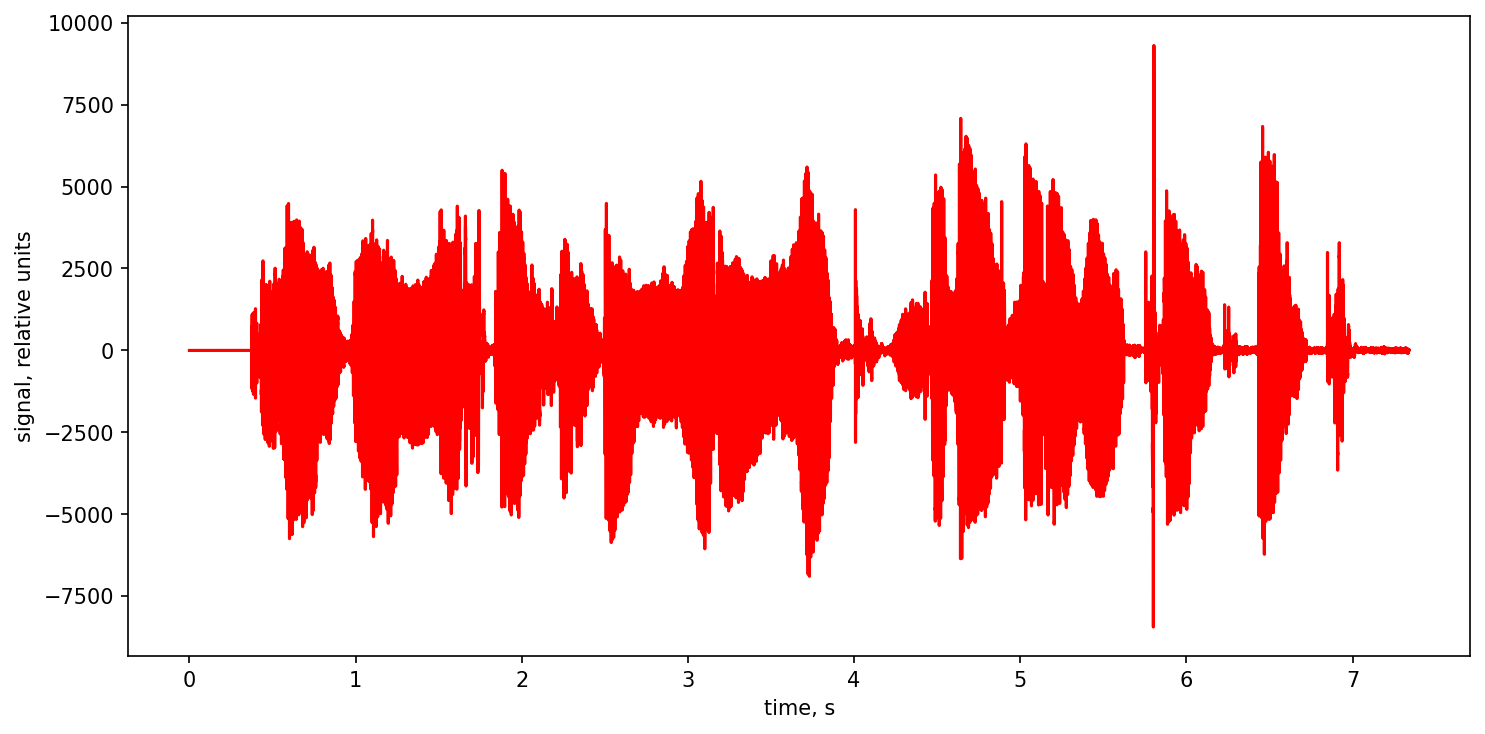

In [7]:
time = np.arange(sig_audio.shape[0]) / sig_audio.shape[0] * length_in_s

plt.figure(figsize=(10, 5), dpi=150)
plt.plot(time, sig_audio, 'r')
plt.xlabel("time, s")
plt.ylabel("signal, relative units")
plt.tight_layout()
plt.show()

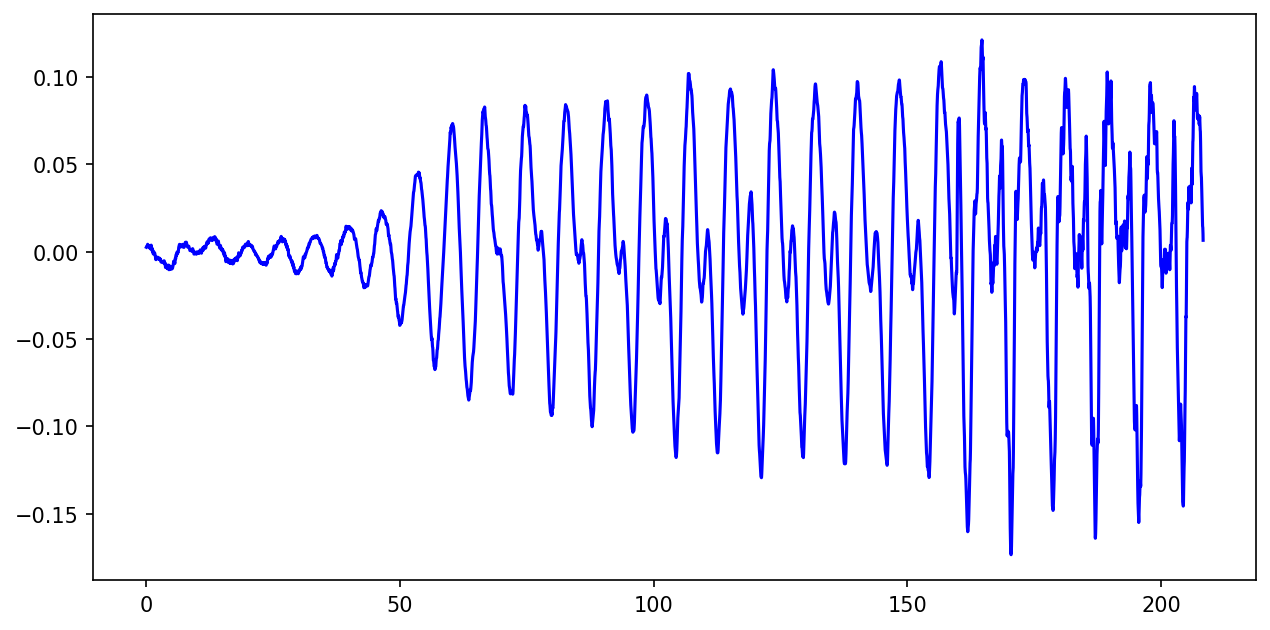

In [8]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal[45000:55000]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)

plt.figure(figsize=(10, 5), dpi=150)
plt.plot(time_axis, pow_audio_signal, color='blue')

### Transforming Audio Frequencies

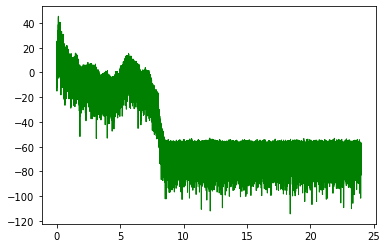

In [9]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(int)# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)

In [10]:
sig_audio.shape

(352320,)

### Plotting the frequency content with FT

In [11]:
fft_spectrum = np.fft.rfft(sig_audio)
freq = np.fft.rfftfreq(sig_audio.size, d=1./freq_sample)
fft_spectrum_abs = np.abs(fft_spectrum)

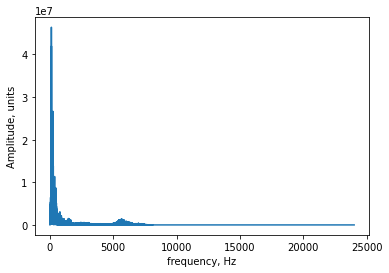

In [12]:
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

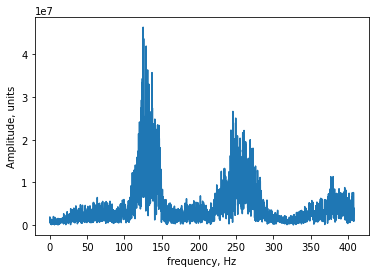

In [13]:
plt.plot(freq[:3000], fft_spectrum_abs[:3000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [14]:
#write('output.wav', Fs, data)